# 第3章　最尤推定法：確率を用いた推定理論

## 3.2 単純化した例による解説

**[03MG-01]**

必要なモジュールをインポートします。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

from numpy.random import normal
from scipy.stats import norm

import matplotlib
matplotlib.rcParams['font.size'] = 12

**[03MG-02]**

平均 0、標準偏差 0.1 の正規分布から指定された個数のデータを生成して、最尤推定法で平均と標準偏差を推定した上で、結果をグラフに表示する関数を定義します。

平均と分散の推定値は、それぞれ、標本平均、および、標本分散として計算されます。

$$
\mu=\frac{1}{N}\sum_{n=1}^Nt_n,\ \sigma^2 = \frac{1}{N}\sum_{n=1}^N(t_n-\mu)^2
$$

In [2]:
def show_mle(subplot, num):
  ds = normal(loc=0, scale=1, size=num)
    
  mu = np.mean(ds)                # 標本平均
  sigma = np.sqrt(np.var(ds))     # 標本分散の平方根

  subplot.set_title('N={}'.format(num), fontsize=14)
  
  # 真の曲線を表示
  linex = np.arange(-10, 10.1, 0.1)
  original = norm(loc=0, scale=1)
  subplot.plot(linex, original.pdf(linex), color='green', linestyle='--')
    
  # 推定した曲線を表示
  estimate = norm(loc=mu, scale=sigma)
  label = 'sigma={:.2f}'.format(sigma)
  subplot.plot(linex, estimate.pdf(linex), color='red', label=label)
  subplot.legend(loc=1)
    
  # サンプルの表示
  subplot.scatter(ds, original.pdf(ds), marker='o', color='blue')
  subplot.set_xlim(-4, 4)
  subplot.set_ylim(0)

**[03MG-03]**

データ数を変化させながら、結果をグラフに表示します。

データ数が増えるにしたがって、推定値が真の母数に近づくことがわかります。また、データ数が少ない場合は、分散が真の母数よりも小さく推定されていることがわかります。

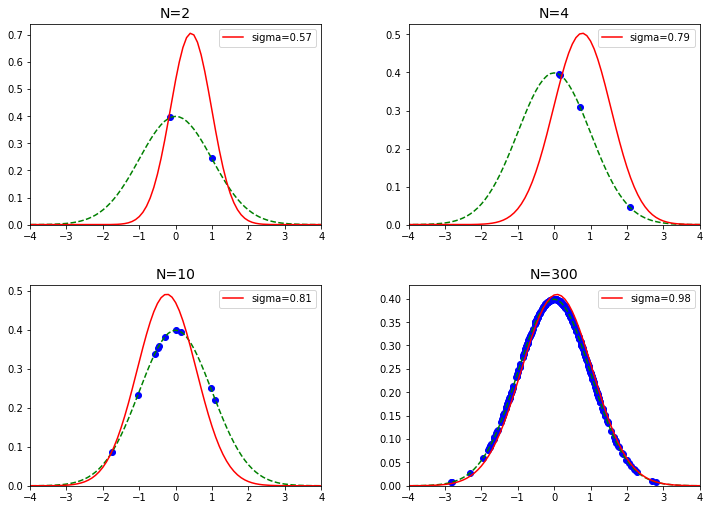

In [3]:
fig = plt.figure(figsize=(12, 8.5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for c, num in enumerate([2, 4, 10, 300]):
  subplot = fig.add_subplot(2, 2, c+1)
  show_mle(subplot, num)